In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV

# Feature engineering
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# model building
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,log_loss

# optional filters
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',58)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [5]:
for i in df.columns:
    print(i,':',df[i].nunique())

Id : 617
AB : 217
AF : 599
AH : 227
AM : 605
AR : 130
AX : 427
AY : 148
AZ : 484
BC : 259
BD  : 617
BN : 53
BP : 612
BQ : 515
BR : 566
BZ : 115
CB : 553
CC : 602
CD  : 584
CF : 586
CH : 135
CL : 123
CR : 595
CS : 576
CU : 307
CW  : 426
DA : 611
DE : 616
DF : 137
DH : 191
DI : 571
DL : 604
DN : 576
DU : 253
DV : 39
DY : 590
EB : 439
EE : 513
EG : 610
EH : 127
EJ : 2
EL : 311
EP : 275
EU : 455
FC : 600
FD  : 337
FE : 615
FI : 498
FL : 388
FR : 435
FS : 161
GB : 560
GE : 264
GF : 611
GH : 596
GI : 615
GL : 355
Class : 2


In [6]:
df.drop('Id',axis = 1,inplace = True)

In [7]:
df['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [8]:
df.isna().sum()

AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [9]:
l = ['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']

In [10]:
df['FC'].value_counts()

14.845488    2
29.302560    2
17.484432    2
32.187120    2
18.609696    2
            ..
22.162560    1
24.321696    1
29.713824    1
35.911344    1
66.893232    1
Name: FC, Length: 600, dtype: int64

In [11]:
mode_cols =  ['BQ', 'CB', 'DU', 'EL', 'FL', 'FS', 'GL']
# mean,median = CC = 0.6888014997068403,0.6587154900000001 FC = 71.34152618181818 , 36.394008,bfill

In [12]:
df['CC'].fillna(df['CC'].median(),inplace = True)
df['FC'] = df['FC'].fillna(method='bfill').fillna(df['FC'].median())

for i in mode_cols:
    df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df.isna().sum().sum()

0

In [14]:
# df = pd.get_dummies(df)
df['EJ'].replace({'A':0,'B':1},inplace = True)

In [15]:
df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,1,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,0,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,1,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,1,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,1,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


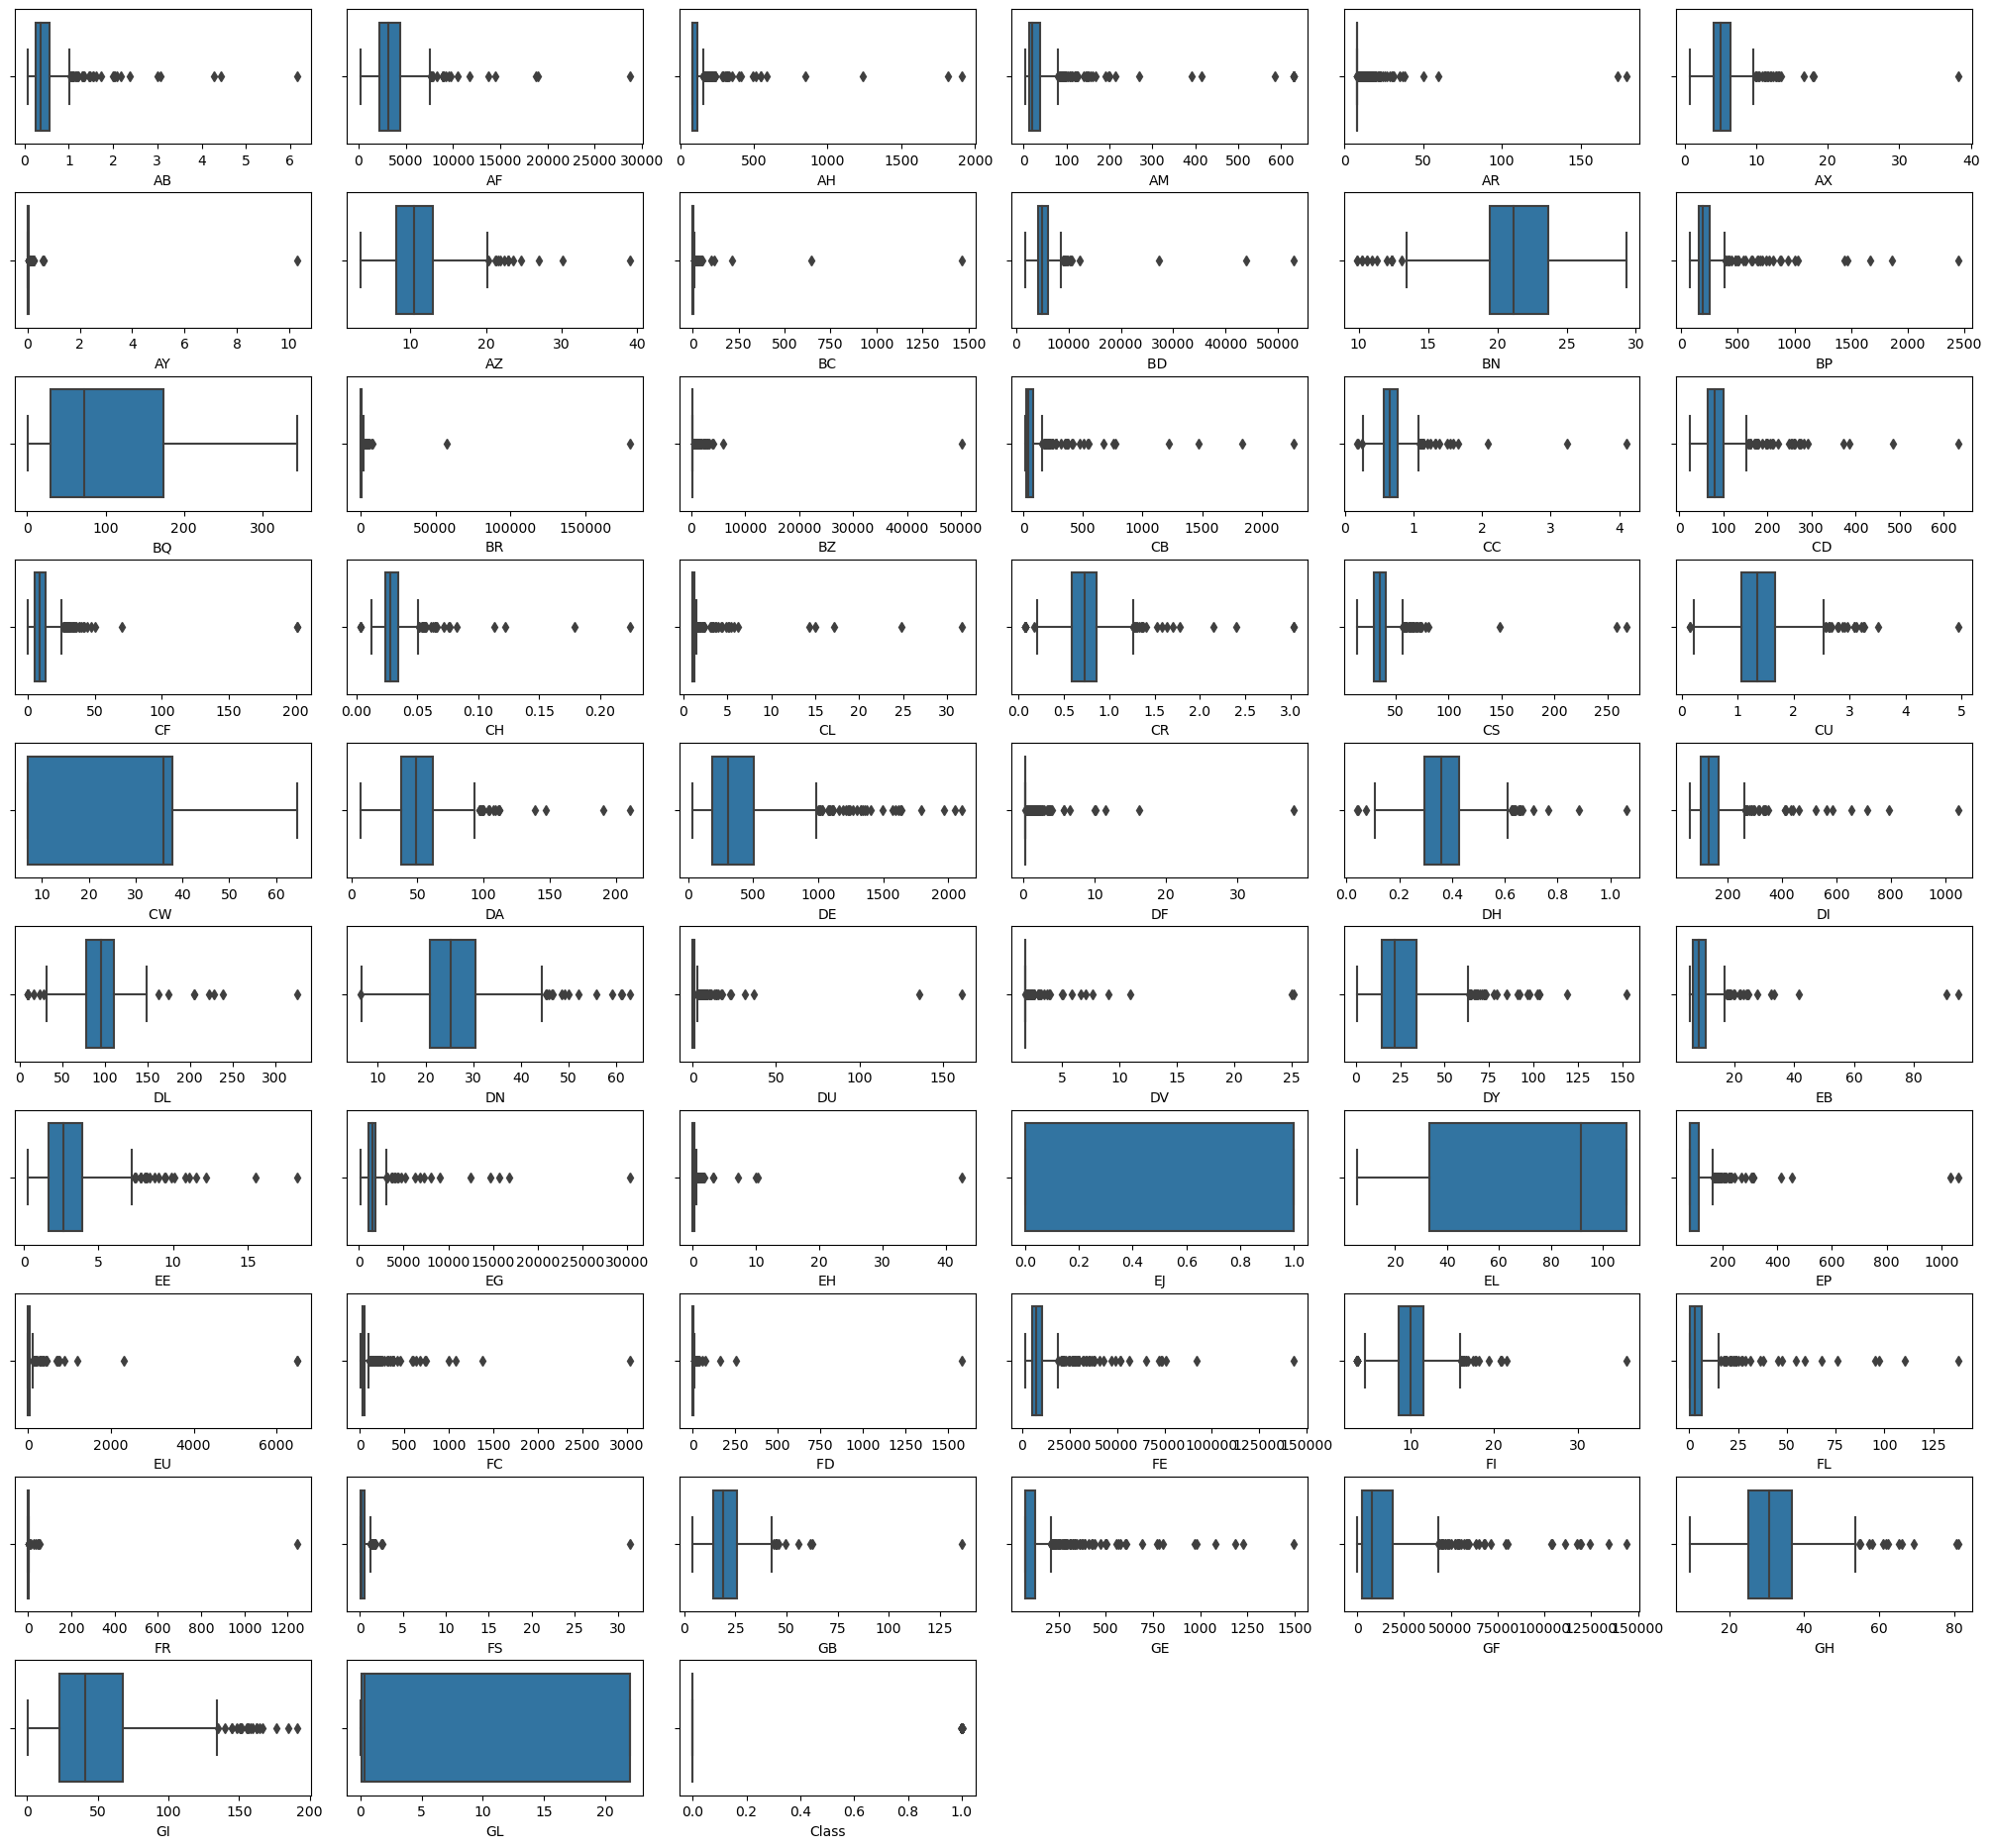

In [16]:
plt.figure(figsize=(20, 20))
cols = df.select_dtypes(include=[int, float]).columns.tolist()
num_plots = len(cols)
rows = 11
cols_per_row = num_plots // rows + 1

for i, col in enumerate(cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])

plt.tight_layout(pad=0.4, h_pad=0.4, w_pad=0.4)
plt.show()

In [17]:
# Loop for replacing outliers under lower bound with the lower bound value:

for col in df.select_dtypes([int,float]).columns:
    if col not in ['Class', 'EJ']:
        col_iqr = df[col].quantile(.75) - df[col].quantile(.25)
        col_min = df[col].quantile(.25) - (1.5 * col_iqr)
        df[col][df[col] < col_min] = col_min
    else:
        pass

In [18]:
# Loop for replacing outliers above upper bound with the upper bound value:

for col in df.select_dtypes([int,float]).columns:
    if col not in ['Class','EJ']:
        col_iqr = df[col].quantile(.75) - df[col].quantile(.25)
        col_max = df[col].quantile(.75) + (1.5 * col_iqr)
        df[col][df[col] > col_max] = col_max
    else:
        pass

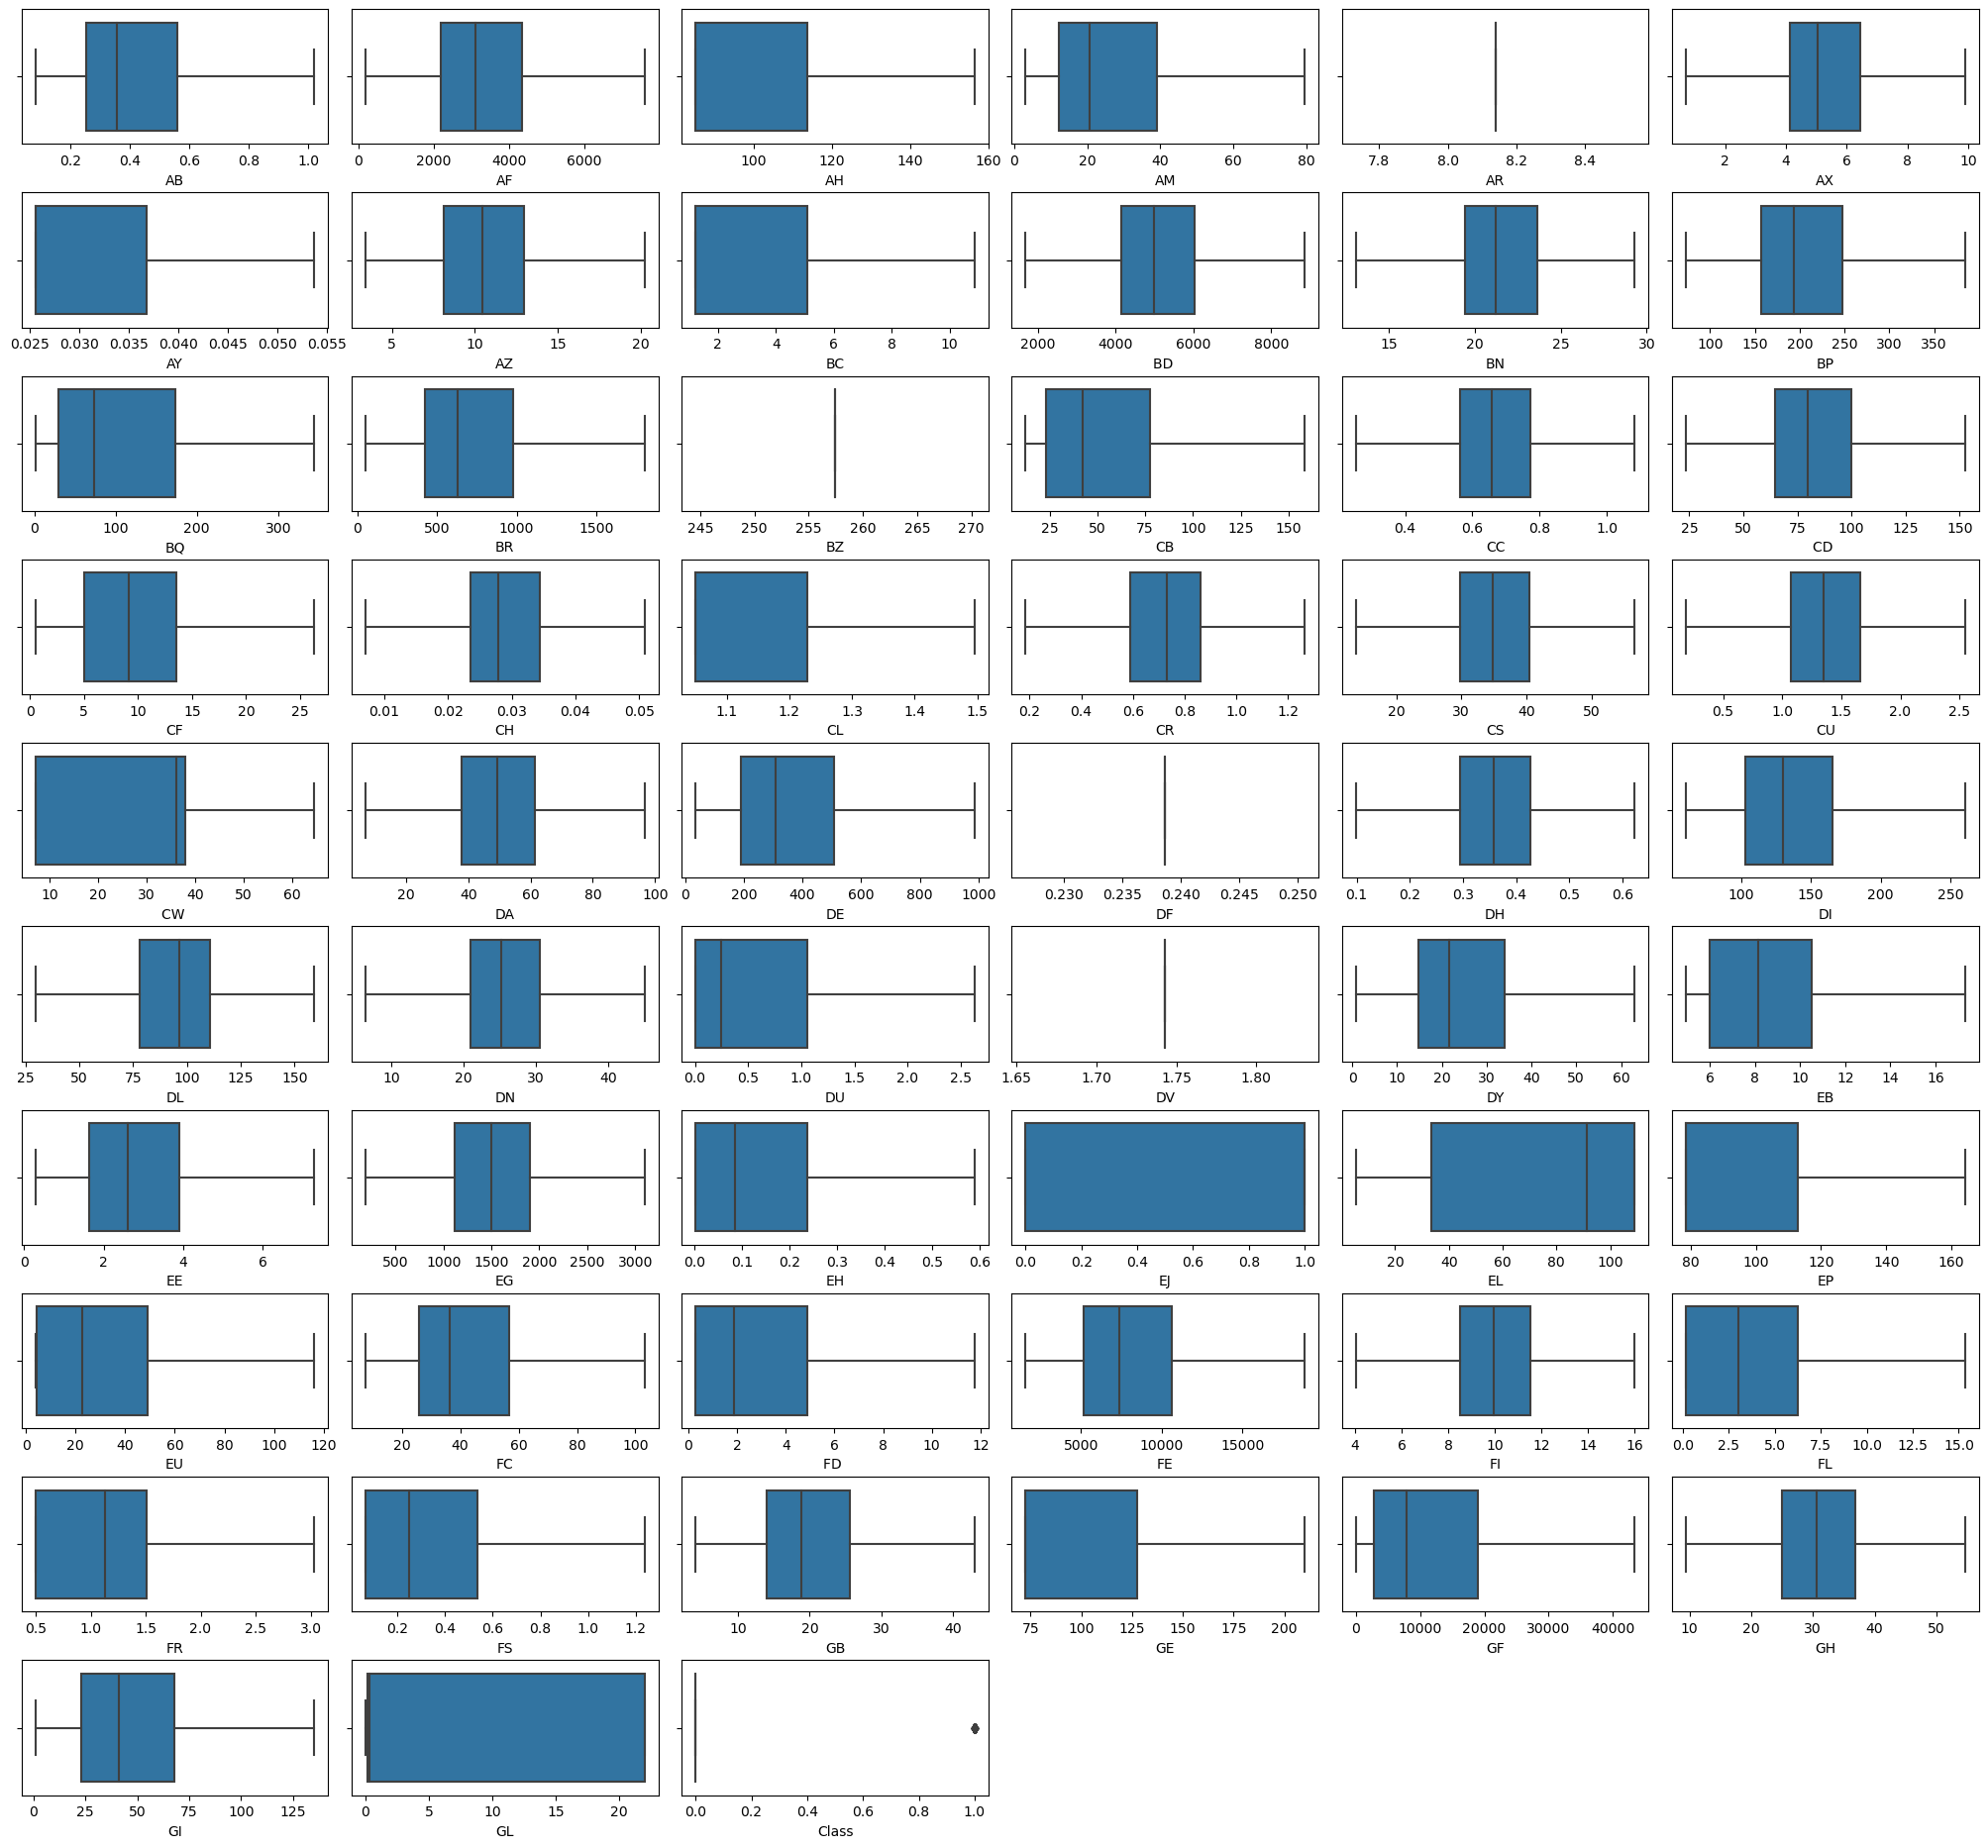

In [19]:
plt.figure(figsize=(20, 20))
cols = df.select_dtypes(include=[int, float]).columns.tolist()
num_plots = len(cols)
rows = 11
cols_per_row = num_plots // rows + 1

for i, col in enumerate(cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])

plt.tight_layout(pad=0.4, h_pad=0.4, w_pad=0.4)
plt.show()

In [20]:
df.reset_index(inplace = True,drop = True)
df

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.184912,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,2.629826,1.74307,23.187704,7.294176,1.987283,1433.166750,0.588627,1,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,4.032759,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,0,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,7.302157,1494.076488,0.377208,1,109.125159,78.526968,5.390628,103.110168,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.629826,1.74307,52.003884,7.386060,3.813326,3097.512750,0.588627,1,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.053744,3.396778,10.858260,5728.73412,24.0108,324.546318,149.717165,1801.637185,257.432377,82.213495,0.536467,72.644264,26.315293,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,1,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,3.03456,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,8.138688,3.499305,0.053744,8.545512,2.804172,4157.68439,21.1860,167.877117,27.287375,365.516874,257.432377,41.368691,0.691257,55.163024,4.780452,0.013930,1.177525,0.698250,40.159779,1.070298,7.030640,21.75904,355.930925,0.23868,0.445479,176.977590,90.91832,27.957928,0.005518,1.74307,32.508604,8.015112,1.354416,495.086300,0.003042,0,51.618996,78.526968,65.821872,29.708112,0.296850,17167.209610,9.879296,0.173229,1.26092,0.067730,8.967128,210.062582,8095.932828,24.640462,69.191944,21.978000,0
613,0.435846,5462.03438,85.200147,46.551007,8.138688,5.979825,0.025882,12.622906,3.777550,5654.07556,27.1887,285.628059,344.644105,505.006814,257.432377,61.910576,0.772304,85.233928,6.682597,0.038208,1.050225,0.761025,39.852923,2.146113,33.648356,43.90996,157.393715,0.23868,0.437280,192.598575,123.17624,26.750080,0.648318,1.74307,18.197092,8.976360,0

<Axes: >

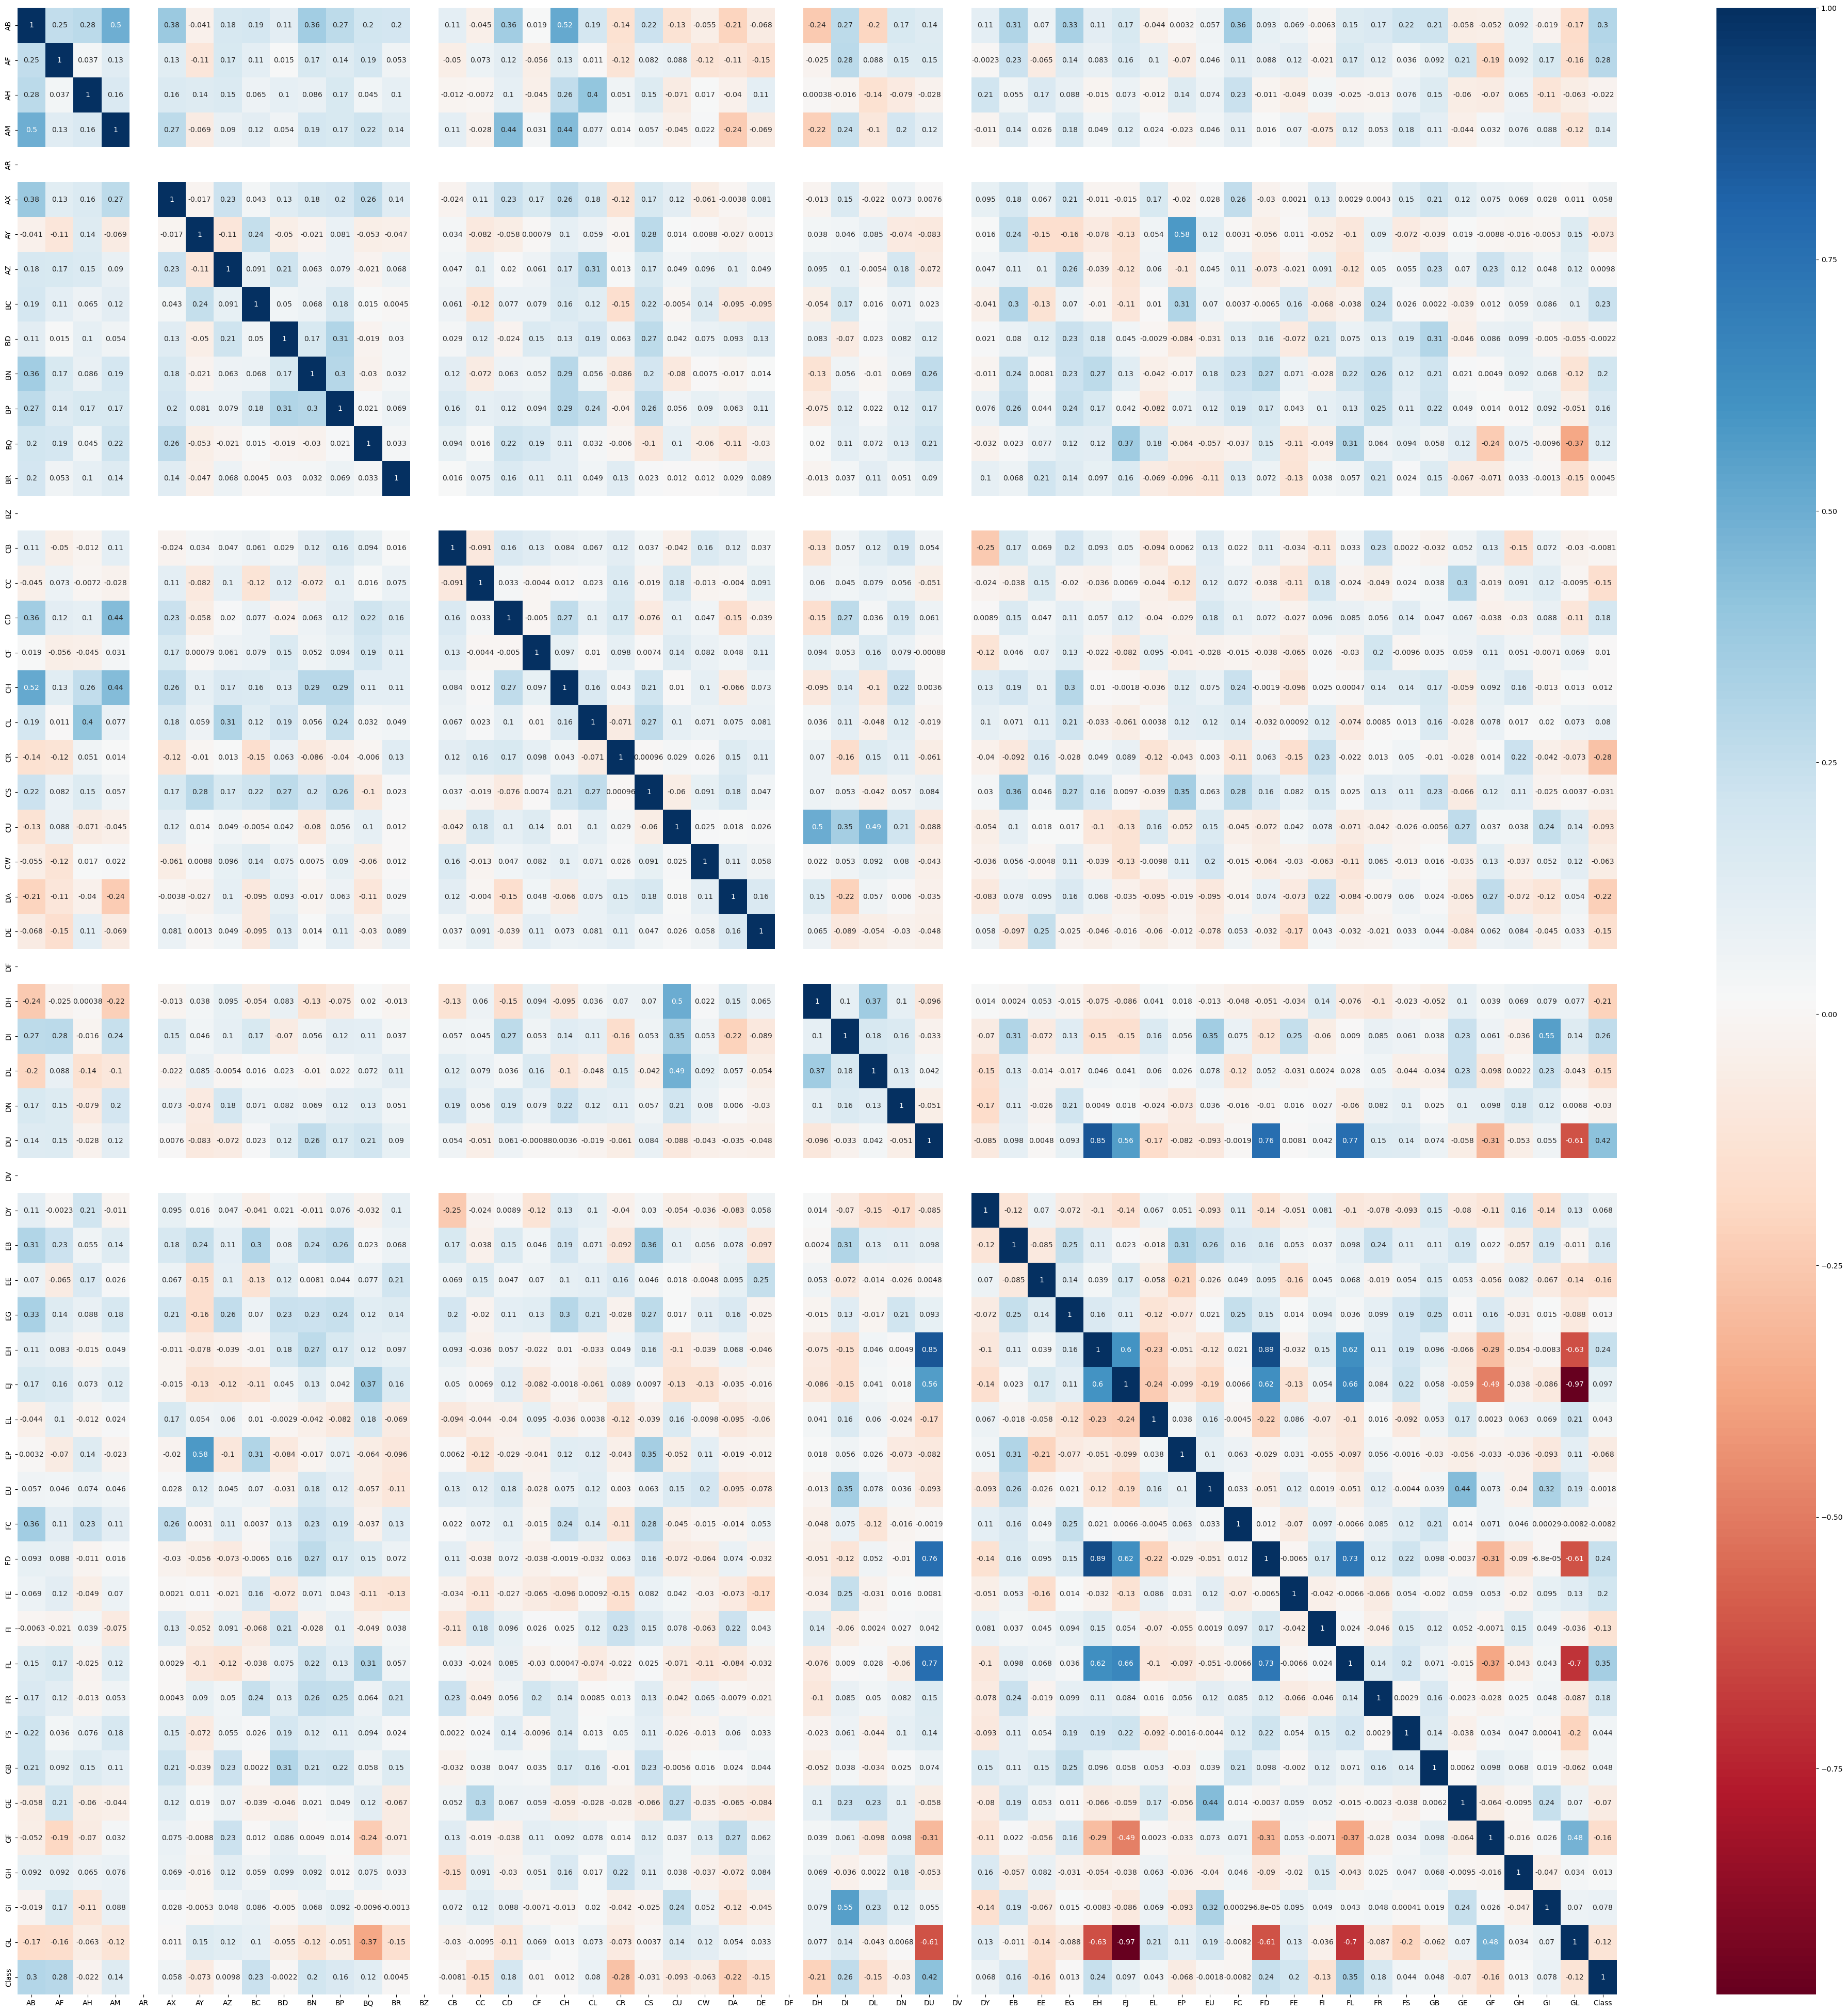

In [21]:
plt.figure(figsize= (50,50))
sns.heatmap(df.corr(),annot = True, cmap = 'RdBu')

## Removing Contant features

In [22]:
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [23]:
cons_feat = [i for i in df.columns if i not in df.columns[var_thres.get_support()]]
cons_feat

['AR', 'BZ', 'DF', 'DV']

In [24]:
df.drop(cons_feat, axis = 1,inplace = True)

## Multicollinearity

In [25]:
cols = [i for i in df.columns]
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        correlation = df[cols[j]].corr(df[cols[i]])
        if (correlation >= 0.80 and j < i):
            print(cols[i] + " : " + cols[j])

EH : DU
FD  : EH


In [26]:
df.drop(['EH'],axis = 1, inplace = True)

### Splitting data in input and target variables

In [27]:
x = df.drop('Class',axis = 1)
y = df['Class']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Feature Scaling
There are two major types of feature scaling :

1. Standardization.

2. Normalization.

We can use StandardScalar to scale our data:

StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.
The values will lie be between -1 and 1.

In [29]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [30]:
x_train.head()

,AB,AF,AH,AM,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DH,DI,DL,DN,DU,DY,EB,EE,EG,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,2.460433,1.322968,-0.632856,2.186121,0.990391,-0.578066,0.324539,-0.691923,-0.114077,0.372092,-0.429738,0.150597,-0.748522,-0.996717,-1.174954,0.211103,-0.977832,1.086002,-0.656092,-1.106376,-0.043216,-0.785259,0.664141,-2.108000,-1.008580,0.108079,2.404245,-0.414846,-0.557476,2.078799,-0.702587,-0.098925,-0.606101,0.294172,0.738549,0.925482,-0.691518,0.723112,-0.174866,-0.820987,2.103838,-0.132129,2.577121,-1.070903,-0.303973,0.196460,-0.657267,-0.182619,-0.479986,2.606310,-0.819928
1,-0.113059,0.295709,1.331657,-0.885046,-0.021938,-0.578066,0.071701,0.109836,-1.239639,-0.783609,-1.018601,1.883430,1.933656,-0.969965,-0.123254,0.760874,0.149871,-0.664732,-0.656092,-0.057456,-0.564008,-0.717339,-1.343447,0.536899,-0.627522,0.082157,0.250405,0.306086,-1.523773,0.248773,-0.254948,0.648029,2.488915,-0.726381,0.738549,0.925482,-0.691518,-0.831698,1.033035,-0.435365,0.022035,-0.248464,0.023499,-0.201102,0.084130,-0.105669,-0.012655,-0.975106,0.015911,-0.577233,-0.811942
2,0.099919,-0.572674,-0.349104,0.545388,0.995282,-0.578066,-1.037375,-0.691923,-2.041506,-0.468418,-1.405401,1.883430,2.252406,-0.821039,-0.666193,0.386148,0.047149,0.412643,-0.656092,0.643454,-2.345545,-0.796579,-1.343447,-1.431253,1.222041,-0.669584,-0.867251,-0.042356,-0.157693,-0.041000,0.685446,-1.127112,0.671690,-2.207389,0.738549,0.925482,-0.691518,-0.531006,-0.963000,-0.684789,-1.090565,-1.243782,-0.278565,-1.070903,-0.896340,-1.065041,-0.657267,-0.919760,2.268576,-1.110647,-0.813452
3,-0.982722,-0.656982,-0.632856,-0.490092,-0.823976,2.015651,-0.196649,-0.691923,-0.362911,-2.149436,-1.313677,-0.938758,-0.657995,-0.996717,0.677380,-0.999951,-0.809618,-0.395388,-0.222032,0.095235,-0.470770,0.867461,-1.343447,-1.284130,-0.772053,1.507871,1.035733,0.584617,0.867558,-0.748342,-1.572377,-1.127112,-0.353351,-0.443754,-1.354006,-1.192736,-0.691518,-0.885237,-0.855185,-0.820987,-0.784859,1.100169,-0.880151,-1.070903,-0.875914,-0.283789,-0.657267,-0.589655,0.833902,-0.111255,1.315518
4,-1.071463,-1.337433,-0.418768,-0.924935,-0.457190,-0.578066,-0.455692,-0.691923,-1.091606,0.372092,-0.446166,-1.015397,0.336389,-0.867697,-0.975979,-0.326481,0.519044,-0.619841,-0.656092,0.355543,0.336605,-0.117379,-1.343447,0.342378,1.347359,-0.773272,-1.279856,-0.928191,-1.817623,1.697637,-0.608840,-0.653516,0.043326,-0.061320,0.738549,0.925482,-0.691518,-0.370138,0.504200,1.932513,2.103838,-0.263545,0.268271,-0.219908,-0.283547,1.791656,-0.657267,-0.425482,-1.135336,-0.512256,-0.795054


### Mutual information

In [31]:
discrete_features = x_train.dtypes == int
def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_classif(x,y,discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores,name = 'MI Scores',index = x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(x_train,y_train,discrete_features)
mi_scores

DU     0.098267
GL     0.081446
FL     0.078852
DA     0.051949
AX     0.047291
FE     0.046713
AF     0.046477
DI     0.044518
FR     0.043603
AH     0.037856
CR     0.036397
GH     0.031365
CC     0.029173
GF     0.029113
AB     0.028426
BQ     0.025754
BC     0.024920
EB     0.024560
AM     0.022822
DL     0.020605
FI     0.020499
EE     0.019725
FC     0.019005
DE     0.017516
BP     0.015341
CS     0.014039
CW     0.012563
BN     0.011481
EU     0.010215
FD     0.009822
CD     0.009784
FS     0.009422
GB     0.006196
EP     0.005160
BR     0.003244
BD     0.000000
AZ     0.000000
GE     0.000000
AY     0.000000
GI     0.000000
EG     0.000000
EL     0.000000
EJ     0.000000
CF     0.000000
DY     0.000000
DN     0.000000
CU     0.000000
CB     0.000000
CL     0.000000
CH     0.000000
DH     0.000000
Name: MI Scores, dtype: float64

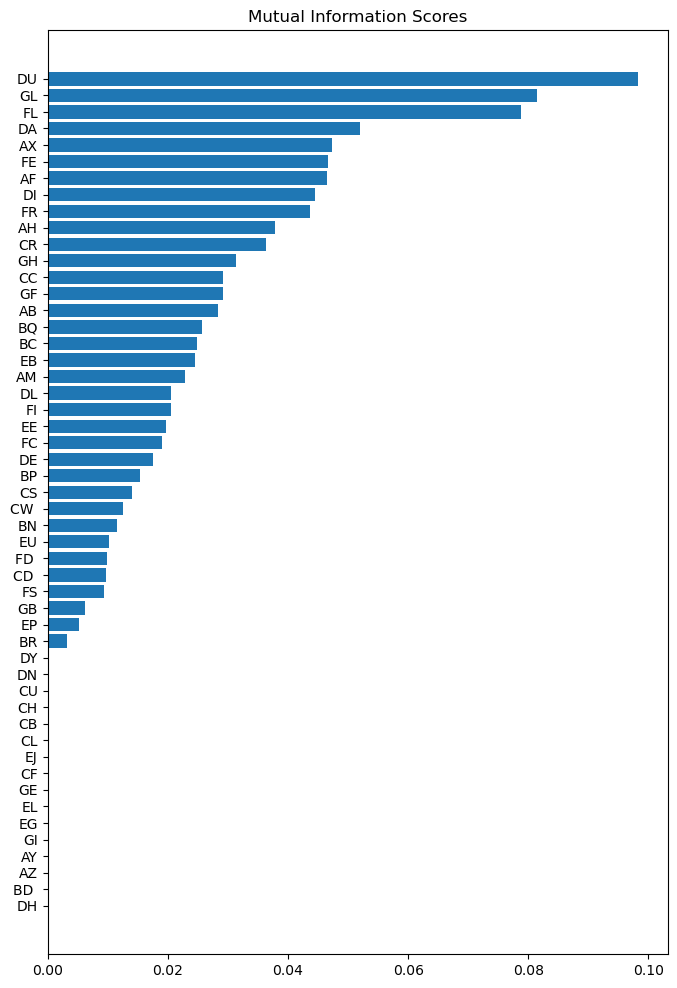

In [32]:
# Plotting bar graph for mi score visualization
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 12))
plot_mi_scores(mi_scores)

In [33]:
# Using Select KBest
top_col = SelectKBest(mutual_info_classif, k=25)
top_col.fit(x_train,y_train)

SelectKBest(k=25, score_func=<function mutual_info_classif at 0x799f4589c550>)

In [34]:
selected_feat = x_train.columns[top_col.get_support()]
selected_feat

Index(['AB', 'AF', 'AM', 'AX', 'BN', 'BP', 'BQ', 'CC', 'CL', 'CR', 'DA', 'DI',
       'DL', 'DU', 'EB', 'EE', 'EP', 'FD ', 'FE', 'FI', 'FL', 'FR', 'GF', 'GH',
       'GL'],
      dtype='object')

In [35]:
x_train = x_train[selected_feat]
x_test = x_test[selected_feat]

In [36]:
x_train.shape

(493, 25)

# PCA

In [37]:
pca = PCA(0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
pca.n_components_

21

In [38]:
x_train_pca.shape

(493, 21)

In [39]:
poly = PolynomialFeatures(degree = 2)
x_train_pca = poly.fit_transform(x_train_pca)
x_test_pca = poly.transform(x_test_pca)

## Model Building

### 1. LogisticRegression

In [40]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

In [41]:
lr_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, n_jobs=-1)
lr_model.fit(x_train_pca,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [42]:
lr_pred = lr_model.predict(x_test_pca)
print('Confusion matrix:\n',confusion_matrix(y_test,lr_pred))
print('\nCalssification Report :\n',classification_report(y_test,lr_pred))
print('\nLog_loss:',log_loss(y_test,lr_pred))

Confusion matrix:
 [[98  3]
 [ 3 20]]

Calssification Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.87      0.87      0.87        23

    accuracy                           0.95       124
   macro avg       0.92      0.92      0.92       124
weighted avg       0.95      0.95      0.95       124


Log_loss: 1.744047744634701


In [43]:
lr_model.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

### 2. KNeighborsClassifier

In [44]:
# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]
# }

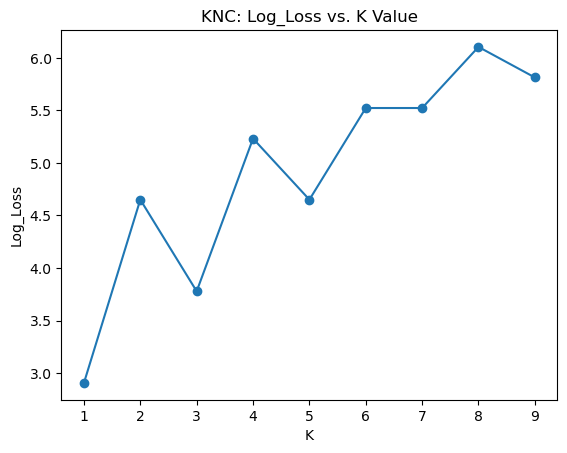

In [45]:
from sklearn.metrics import accuracy_score
k_vals= []
accuracies = []
k_rng = range(1,10)
for k in k_rng:
    KNC = KNeighborsClassifier(n_neighbors=k)
    KNC.fit(x_train_pca,y_train)
    pred = KNC.predict(x_test_pca)
    acc_score = log_loss(y_test,pred)
    k_vals.append(k)
    accuracies.append(acc_score)

# graph
plt.plot(k_vals, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Log_Loss')
plt.title('KNC: Log_Loss vs. K Value')
plt.show()

In [46]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(x_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
# kn.best_params_

In [48]:
kn_pred = kn.predict(x_test_pca)
print('Confusion matrix:\n',confusion_matrix(y_test,kn_pred))
print('\nCalssification Report :\n',classification_report(y_test,kn_pred))
print('\nLog_loss:',log_loss(y_test,kn_pred))

Confusion matrix:
 [[101   0]
 [ 13  10]]

Calssification Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       101
           1       1.00      0.43      0.61        23

    accuracy                           0.90       124
   macro avg       0.94      0.72      0.77       124
weighted avg       0.91      0.90      0.88       124


Log_loss: 3.778770113375185


### 3. XGBoost

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

In [50]:
xg = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
xg.fit(x_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [51]:
xg_pred = xg.predict(x_test_pca)
print('Confusion matrix:\n',confusion_matrix(y_test,xg_pred))
print('\nCalssification Report :\n',classification_report(y_test,xg_pred))
print('\nLog_loss:',log_loss(y_test,xg_pred))

Confusion matrix:
 [[100   1]
 [  9  14]]

Calssification Report :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       101
           1       0.93      0.61      0.74        23

    accuracy                           0.92       124
   macro avg       0.93      0.80      0.84       124
weighted avg       0.92      0.92      0.91       124


Log_loss: 2.9067462410578346


### Best model : LogisticRegression

## LogisticRegression Pipeline

In [52]:
# splitting data
x,y = df.drop('Class',axis =1)[selected_feat],df['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [53]:
# Creating the pipeline
lr_pipeline = Pipeline( [ ('Standard Scaling', StandardScaler())
                          ,('PCA' , PCA(0.95) )
                          ,('poly', PolynomialFeatures(degree = 2)) 
                         ,('LogisticRegression',LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga'))
])

# Fitting the pipeline on the training data
lr_pipeline.fit(x_train, y_train)

# Pipelining predictions
y_pred = lr_pipeline.predict(x_test)

# Calculating the pipeline accuracy
print('Test accuracy = ', round(accuracy_score(y_test, y_pred)*100, 2), '%')
print(classification_report(y_test,y_pred))
print('\nLog_Loss:',log_loss(y_test,y_pred))

Test accuracy =  93.55 %
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       101
           1       0.80      0.87      0.83        23

    accuracy                           0.94       124
   macro avg       0.88      0.91      0.90       124
weighted avg       0.94      0.94      0.94       124


Log_Loss: 2.325396992846268


# Prediction of test set

In [54]:
test_set = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
ids = test_set['Id']
test_df = test_set[selected_feat]

In [55]:
class_probabilities = lr_pipeline.predict_proba(test_df)

# Create a DataFrame for predictions
submission = pd.DataFrame(class_probabilities, columns=['class_0', 'class_1'])

# Adding the 'id' column back to the DataFrame
submission.insert(0, 'id', ids)

In [56]:
submission

,id,class_0,class_1
0,00eed32682bb,0.999994,0.000006
1,010ebe33f668,0.999994,0.000006
2,02fa521e1838,0.999994,0.000006
3,040e15f562a2,0.999994,0.000006
4,046e85c7cc7f,0.999994,0.000006


In [57]:
submission.to_csv('/kaggle/working/submission.csv',index = False)